# Thyroid Classification

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/home/aladdin/Desktop/zips/thyroid.csv')

In [5]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [7]:
df.shape

(9172, 31)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9172.0,7.355582e+01,1.183977e+03,1.000000e+00,3.700000e+01,5.500000e+01,6.800000e+01,6.552600e+04
TSH,8330.0,5.218403e+00,2.418401e+01,5.000000e-03,4.600000e-01,1.400000e+00,2.700000e+00,5.300000e+02
T3,6568.0,1.970629e+00,8.875788e-01,5.000000e-02,1.500000e+00,1.900000e+00,2.300000e+00,1.800000e+01
TT4,8730.0,1.087003e+02,3.752267e+01,2.000000e+00,8.700000e+01,1.040000e+02,1.260000e+02,6.000000e+02
T4U,8363.0,9.760557e-01,2.003604e-01,1.700000e-01,8.600000e-01,9.600000e-01,1.065000e+00,2.330000e+00
FTI,8370.0,1.136407e+02,4.155165e+01,1.400000e+00,9.300000e+01,1.090000e+02,1.280000e+02,8.810000e+02
TBG,349.0,2.987006e+01,2.108050e+01,1.000000e-01,2.100000e+01,2.600000e+01,3.100000e+01,2.000000e+02
patient_id,9172.0,8.529473e+08,7.581969e+06,8.408010e+08,8.504090e+08,8.510040e+08,8.607110e+08,8.701190e+08


## 2.Data Cleaning

### Duplicates

In [11]:
df.duplicated().sum()

0

### Feature Cleaning

`TSH_measured`  
`T3_measured`  
`TT4_measured`  
`T4U_measured`  
`FTI_measured`  
`TBG_measured`  
<span style="color:blue; font-size:20px">__Columns checks patient had measured or not.__</span>


In [14]:
df.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','referral_source','patient_id'],axis=1 ,inplace=True)

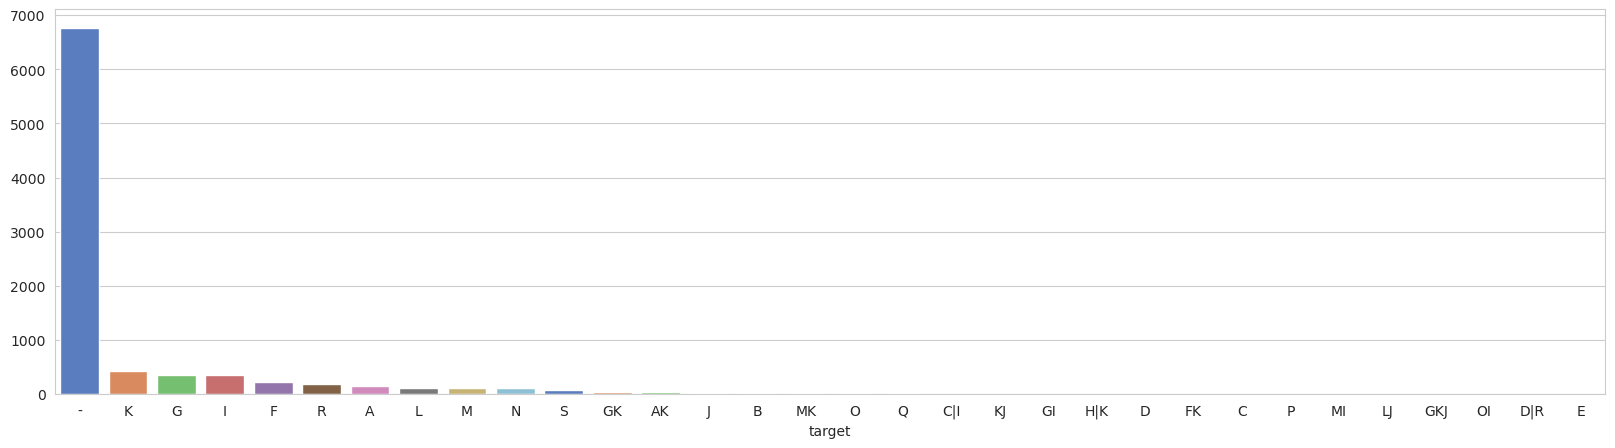

In [15]:
sns.set_style('whitegrid')
target_values = df['target'].value_counts()
plt.figure(figsize=(20, 5))
sns.barplot(data=pd.DataFrame(target_values), x= target_values.keys(), hue=target_values.keys(), y=target_values.values, palette="muted", legend=False)
plt.show()

In [16]:
mapping = {
    # Negative class
    '-': 'negative',

    # Hypothyroid class
    'A': 'hypothyroid',
    'B': 'hypothyroid',
    'C': 'hypothyroid',
    'D': 'hypothyroid',
    'E': 'hypothyroid',
    'F': 'hypothyroid',
    'AK': 'hypothyroid',
    'FK': 'hypothyroid',
    'MK': 'hypothyroid',
    'C|I': 'hypothyroid',
    'D|R': 'hypothyroid',

    # Hyperthyroid class
    'G': 'hyperthyroid',
    'H': 'hyperthyroid',
    'I': 'hyperthyroid',
    'J': 'hyperthyroid',
    'K': 'hyperthyroid',
    'L': 'hyperthyroid',
    'M': 'hyperthyroid',
    'N': 'hyperthyroid',
    'O': 'hyperthyroid',
    'P': 'hyperthyroid',
    'GI': 'hyperthyroid',
    'GK': 'hyperthyroid',
    'KJ': 'hyperthyroid',
    'GKJ': 'hyperthyroid',
    'MI': 'hyperthyroid',
    'OI': 'hyperthyroid',
    'H|K': 'hyperthyroid',
    'LJ': 'hyperthyroid',
    'S': 'hyperthyroid',
    'R': 'hyperthyroid',
    'Q': 'hyperthyroid'
}

In [17]:
df['target'] = df['target'].map(mapping)

In [18]:
df['target']

0           negative
1           negative
2           negative
3           negative
4       hyperthyroid
            ...     
9167        negative
9168        negative
9169    hyperthyroid
9170        negative
9171        negative
Name: target, Length: 9172, dtype: object

In [19]:
pd.DataFrame(df['target'].value_counts())

,count
target,
negative,6771
hyperthyroid,1904
hypothyroid,497


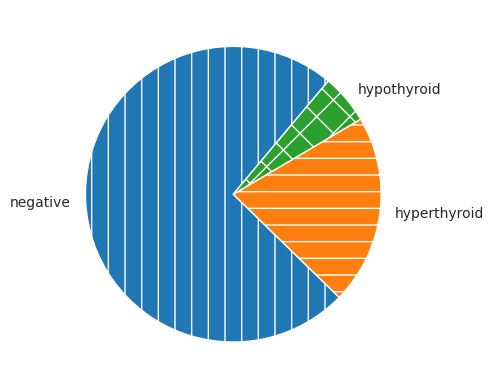

In [20]:
fig, ax = plt.subplots()
ax.pie(df['target'].value_counts(), labels= df['target'].value_counts().keys(), hatch=['|', '-', 'X'], startangle=50)
plt.show()

### Outliers

In [22]:
pd.DataFrame(df['age'].sort_values(ascending=False).head(7))

,age
8105,65526
6392,65512
5710,65511
2976,455
790,97
7356,97
7355,97


In [23]:
df = df[df['age'] < 100]

### Handling Missing Values

In [25]:
missing = df.isna().sum()
missing = missing[missing > 0]
percentage = (missing / len(df)) * 100
formatted_percentage = percentage.round(2).astype('str') + '%'

pd.DataFrame({
    'missing_count': missing,
    'missing_percentage': formatted_percentage
})

,missing_count,missing_percentage
sex,307,3.35%
TSH,842,9.18%
T3,2603,28.39%
TT4,442,4.82%
T4U,809,8.82%
FTI,802,8.75%
TBG,8819,96.19%


In [26]:
df.drop('TBG', axis=1, inplace=True)

In [27]:
sex_to_num = {
    'F': 0,
    'M': 1
}

In [28]:
df['sex'] = df['sex'].map(sex_to_num)

## Model Training

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, auc, precision_score, recall_score, roc_auc_score, ConfusionMatrixDisplay

In [31]:
X = df.drop(columns=['target'])
y = df['target']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Column types

In [34]:
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

### Preprocessing pipelines

In [36]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [37]:
preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

### Defining models

In [39]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42)
}

### Complete pipelines

In [41]:
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

### Hyperparameter tuning

In [43]:
param_grids = {
    'Decision Tree': {
        'classifier__max_depth': [3, 5, 10, None],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['lbfgs']  # optional but recommended for 'l2'
    }
}

### Perform grid search for each model

In [45]:
grid_results = {}
for name in models.keys():
    grid = GridSearchCV(
        pipelines[name],
        param_grids[name],
        cv=5,
        scoring='recall_macro',
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    grid_results[name] = grid

### Evaluation function

In [47]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    results = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro'),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    } 
    return results

### Collect results for all models

In [49]:
evaluation_results = []
for name, grid in grid_results.items():
    best_model = grid.best_estimator_
    results = evaluate_model(best_model, X_test, y_test, name)
    evaluation_results.append(results)

### Comparison DataFrame

In [51]:
results_df = pd.DataFrame(evaluation_results)
results_df = results_df.set_index('Model')
results_df['Accuracy']  = (results_df['Accuracy'] * 100).round(0).astype('str')  + '%'
results_df['Precision'] = (results_df['Precision'] * 100).round(0).astype('str') + '%'
results_df['Recall']    = (results_df['Recall'] * 100).round(0).astype('str')    + '%'
results_df['F1-Score']  = (results_df['F1-Score'] * 100).round(0).astype('str')  + '%'
results_df['ROC-AUC']   = (results_df['ROC-AUC'] * 100).round(0).astype('str')   + '%'
results_df

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Model,,,,,
Decision Tree,94.0%,90.0%,92.0%,91.0%,95.0%
Logistic Regression,80.0%,76.0%,54.0%,59.0%,84.0%


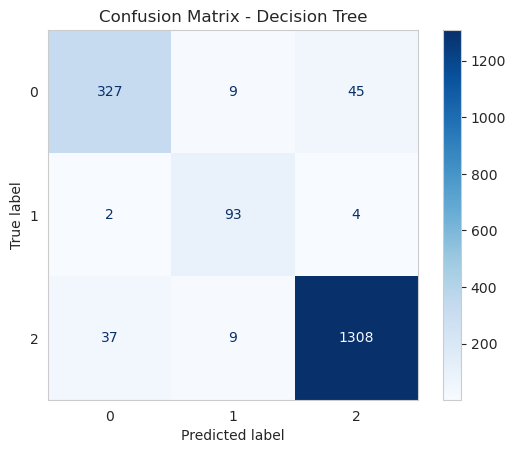

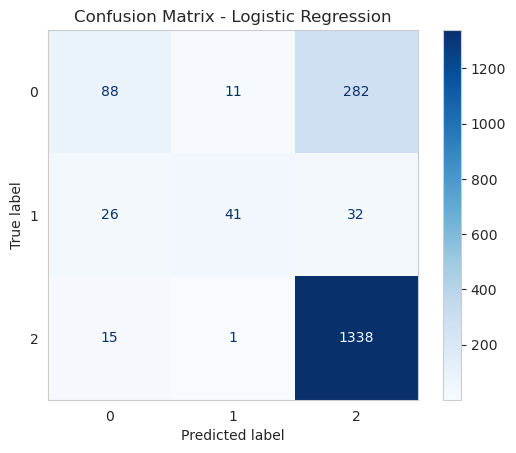

In [52]:
for name, grid in grid_results.items():
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    # Compute and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.grid(False)
    plt.show()